In [1]:
from matplotlib import pyplot as plt
import glob
import numpy as np

In [2]:
import pandas as pd

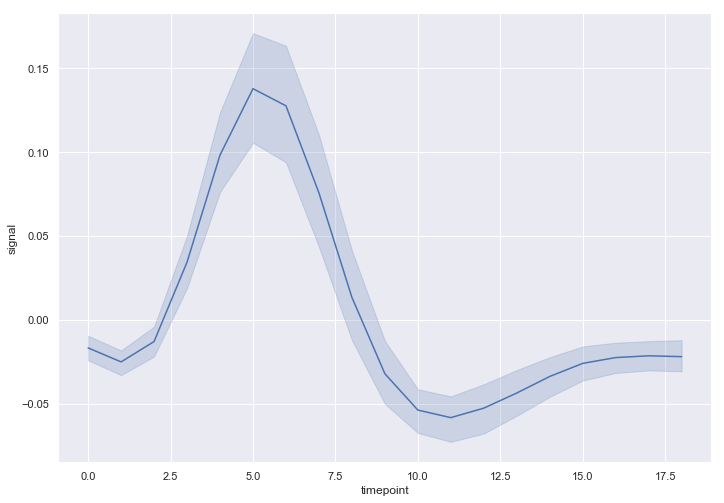

In [45]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

In [46]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


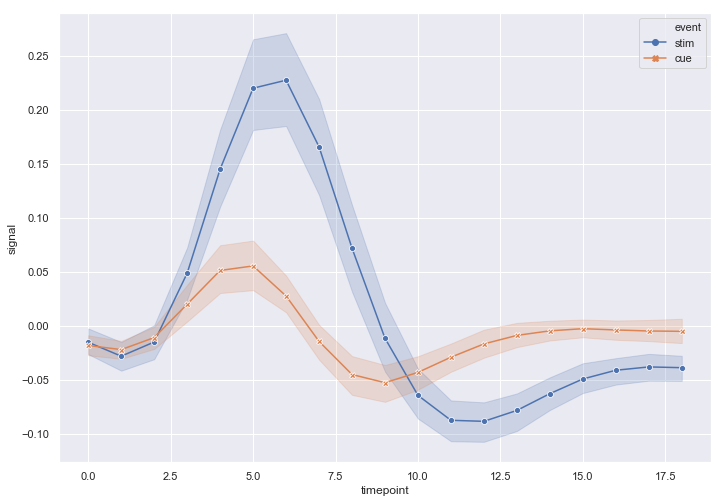

In [47]:
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="event", style="event",
                  markers=True, dashes=False, data=fmri)

In [78]:
def stat(path):
    acc = []
    for f in glob.glob(path+'*'):
        with open(f) as ff:
            _, _, test_acc = map(float, ff.readline().split(' '))
            acc.append(test_acc)
    return acc

In [79]:
stat("../IMDBBINARY_0.05")

[0.29, 0.24, 0.3, 0.37, 0.18, 0.3, 0.33, 0.36, 0.2, 0.32]

In [80]:
stat("../estimate_backward_IMDBBINARY_0.05")

[0.31, 0.31, 0.32, 0.3, 0.33, 0.19, 0.31, 0.24, 0.4, 0.28]

In [51]:
"la".ljust(3,'0')

'la0'

In [82]:
IMDBBINARY_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc in stat("../IMDBBINARY_{}".format(noise)):
        IMDBBINARY_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
    for acc in stat("../estimate_backward_IMDBBINARY_{}".format(noise)):
        IMDBBINARY_est.append({'noise': noise, 'acc': acc, 'std': std, 'data': 'backward'})
IMDBBINARY_est = pd.DataFrame(IMDBBINARY_est)

/home/gear/anaconda3/envs/graph/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


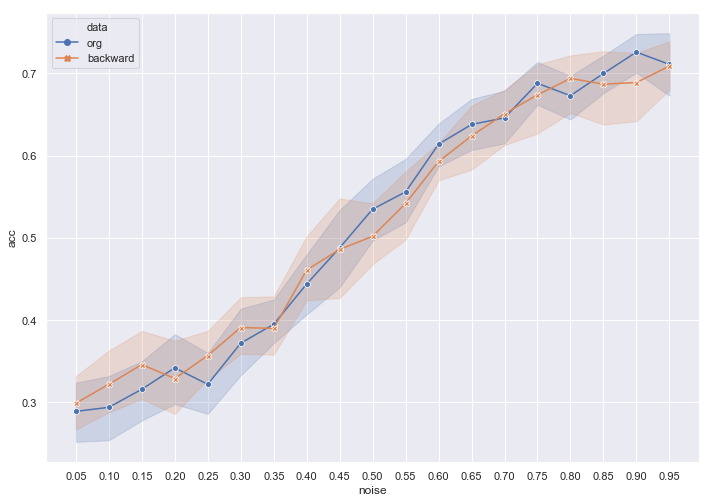

In [83]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=IMDBBINARY_est)

In [84]:
IMDBMULTI_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc in stat("../IMDBMULTI_{}".format(noise)):
        IMDBMULTI_est.append({'noise': noise, 'acc': acc, 'std': std, 'data': 'org'})
    for acc in stat("../estimate_backward_IMDBMULTI_{}".format(noise)):
        IMDBMULTI_est.append({'noise': noise, 'acc': acc, 'std': std, 'data': 'backward'})
IMDBMULTI_est = pd.DataFrame(IMDBMULTI_est)

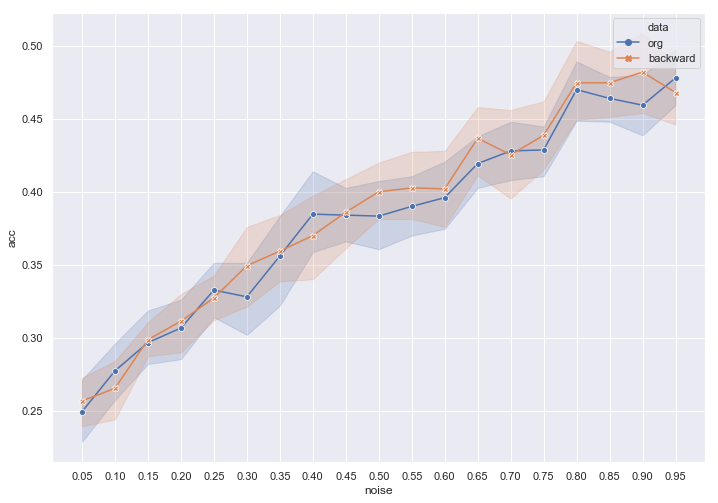

In [85]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=IMDBMULTI_est)

In [87]:
PROTEINS_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc in stat("../PROTEINS_{}".format(noise)):
        PROTEINS_est.append({'noise': noise, 'acc': acc, 'std': std, 'data': 'org'})
    for acc in stat("../estimate_backward_PROTEINS_{}".format(noise)):
        PROTEINS_est.append({'noise': noise, 'acc': acc, 'std': std, 'data': 'backward'})
PROTEINS_est = pd.DataFrame(PROTEINS_est)

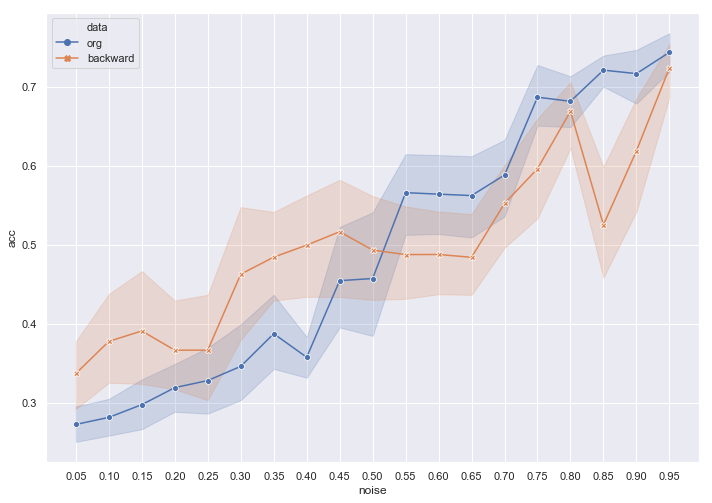

In [88]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=PROTEINS_est)

In [89]:
MUTAG_exact = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc in stat("../results/MUTAG/MUTAG_self_{}".format(noise)):
        MUTAG_exact.append({'noise': noise, 'acc': acc, 'std': std, 'data': 'org'})
    for acc in stat("../exact_backward_MUTAG_{}".format(noise)):
        MUTAG_exact.append({'noise': noise, 'acc': acc, 'std': std, 'data': 'exact_backward'})
MUTAG_exact = pd.DataFrame(MUTAG_exact)

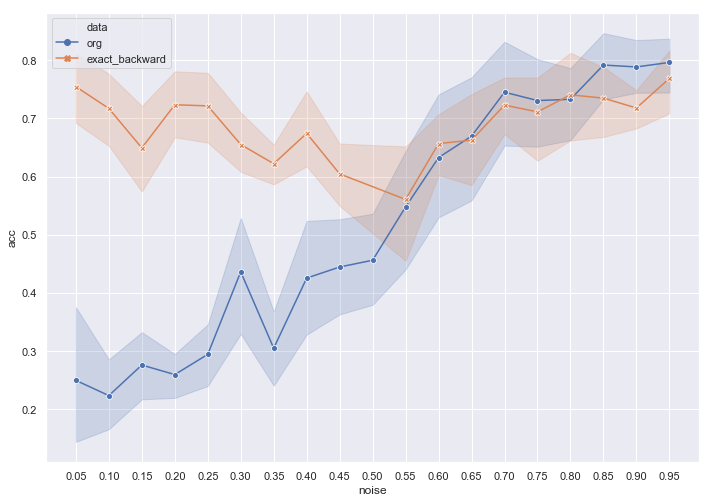

In [91]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=MUTAG_exact)